In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

Data Collection & Processing

In [2]:
# Loading the csv data to a Pandas Dataframe
gold_data = pd.read_csv(r'G:\machine learing\projects\ML-Project\gld_price_data.csv')


In [3]:
# first 5 rows of the dataframe
gold_data.head() 

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,1.475492,NaN
3,1/7/2008,1416.180054,NaN,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099


In [4]:
# last 5 rows of the dataframe
gold_data.tail() 

,Date,SPX,GLD,USO,SLV,EUR/USD
2666,2/22/2013,1515.599908,152.970000,33.599998,27.830000,1.319430
2667,2/25/2013,1487.849918,154.339996,33.209999,28.070000,1.319592
2668,2/26/2013,1496.939941,156.220001,33.313000,28.410000,1.306506
2669,2/27/2013,1515.989990,154.570007,33.400002,28.010000,1.306592
2670,2/28/2013,1514.680054,153.000000,33.061000,27.540001,1.310510


In [5]:
# number of rows(2290) and columns(6)
gold_data.shape 

(2671, 6)

In [6]:
# getting some informations about the dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2671 non-null   object 
 1   SPX      2663 non-null   float64
 2   GLD      2664 non-null   float64
 3   USO      2668 non-null   float64
 4   SLV      2669 non-null   float64
 5   EUR/USD  2670 non-null   float64
dtypes: float64(5), object(1)
memory usage: 125.3+ KB


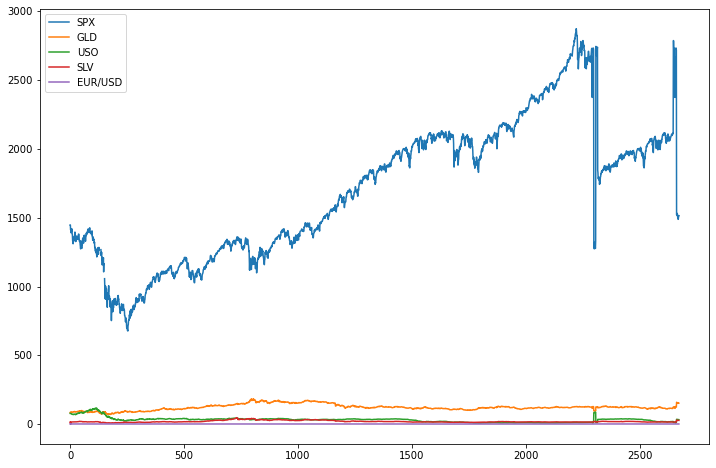

In [7]:
plt.rcParams['figure.figsize'] = [12, 8]#resize the plot
gold_data.plot()
plt.show()

In [8]:
# Check for null values
gold_data.isnull().sum()

Date       0
SPX        8
GLD        7
USO        3
SLV        2
EUR/USD    1
dtype: int64

In [9]:
# statistical Measures of the dataset
gold_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SPX,2663.0,1703.211940,503.517560,676.530029,1284.924988,1795.849976,2067.764893,2872.870117
GLD,2664.0,122.675649,21.751484,70.000000,111.977502,120.940002,129.130005,184.589996
USO,2668.0,31.712597,18.678601,7.960000,16.775001,34.004999,37.680000,117.480003
SLV,2669.0,19.791443,6.685690,1.475492,15.620000,17.370001,20.900000,47.259998
EUR/USD,2670.0,1.283688,0.128399,1.039047,1.177777,1.304053,1.368153,1.598798


In [10]:
gold_data.mean()

SPX        1703.211940
GLD         122.675649
USO          31.712597
SLV          19.791443
EUR/USD       1.283688
dtype: float64

we will not use the colum of date becouse our data does not depend on it.
so we will deal with the other missing values.

In [11]:
# drop the "date",after the cor
data = gold_data.drop(['Date'], axis=1)

In [12]:
data["SPX"].fillna(data['SPX'].mean(),inplace = True)
data["GLD"].fillna(data['GLD'].mean(),inplace = True)
data["USO"].fillna(data['USO'].mean(),inplace = True)
data["SLV"].fillna(data['SLV'].mean(),inplace = True)
data["EUR/USD"].fillna(data['EUR/USD'].mean(),inplace = True)


In [13]:
data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [14]:
data.duplicated().sum()

370

In [15]:
data.drop_duplicates(inplace = True)


In [16]:
data.duplicated().sum()

0

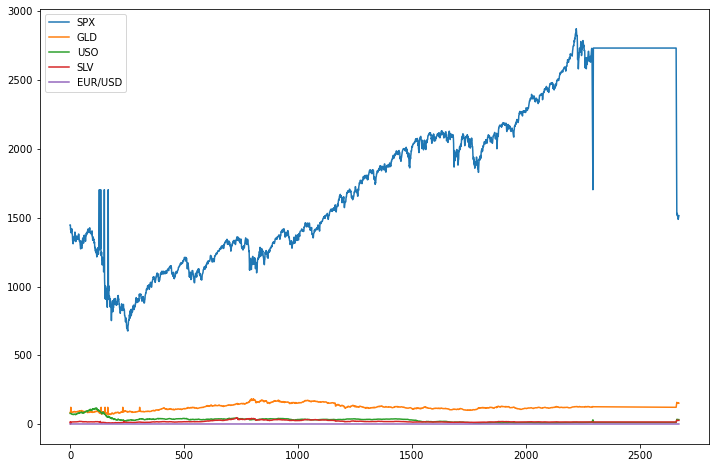

In [17]:
plt.rcParams['figure.figsize'] = [12, 8]#resize the plot
data.plot()
plt.show()

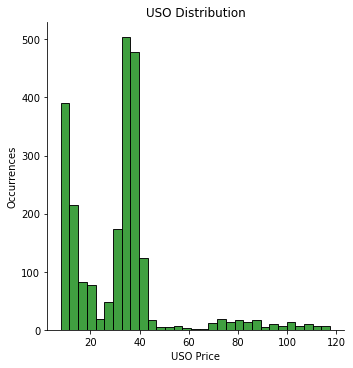

In [18]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['USO'], color='green')
plt.title('USO Distribution')
plt.xlabel('USO Price')
plt.ylabel('Occurrences')
plt.show()

In [19]:
q = data["USO"].quantile(0.98)
data[data["USO"] > q]
data = data[(data["USO"] < q)]

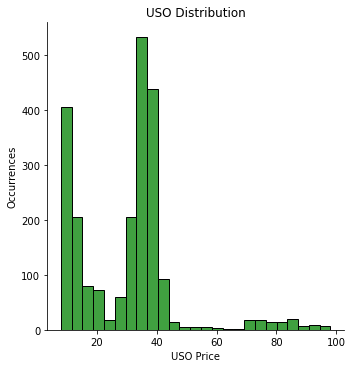

In [20]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['USO'], color='green')
plt.title('USO Distribution')
plt.xlabel('USO Price')
plt.ylabel('Occurrences')
plt.show()

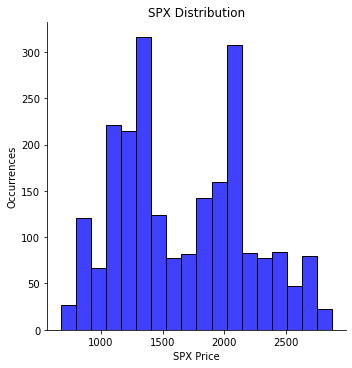

In [21]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['SPX'], color='blue')
plt.title('SPX Distribution')
plt.xlabel('SPX Price')
plt.ylabel('Occurrences')
plt.show()

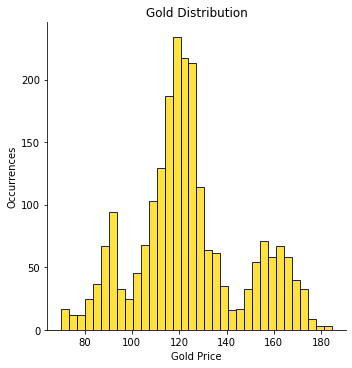

In [22]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['GLD'], color='gold')
plt.title('Gold Distribution')
plt.xlabel('Gold Price')
plt.ylabel('Occurrences')
plt.show()

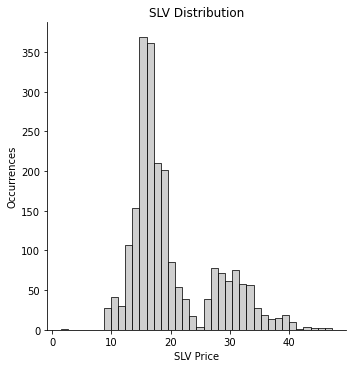

In [23]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['SLV'], color='silver')
plt.title('SLV Distribution')
plt.xlabel('SLV Price')
plt.ylabel('Occurrences')
plt.show()

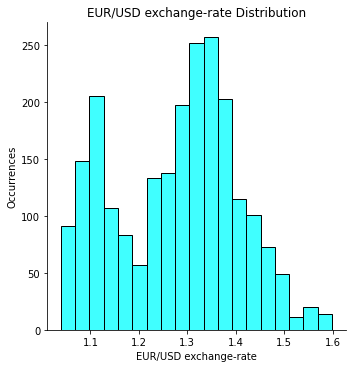

In [24]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['EUR/USD'], color='cyan')
plt.title('EUR/USD exchange-rate Distribution')
plt.xlabel('EUR/USD exchange-rate')
plt.ylabel('Occurrences')
plt.show()

Correlation

In [25]:
# Compute pairwise correlation of columns 
# to identity the highly correlated features.

correlation = data.corr()

<AxesSubplot:>

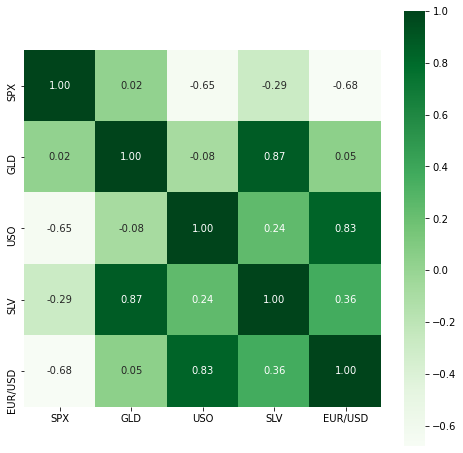

In [26]:
# Construct a heatmap to undestand the correlation
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Greens')

In [27]:
# correlation values of Gold
print(correlation['GLD'])

SPX        0.020335
GLD        1.000000
USO       -0.079614
SLV        0.872966
EUR/USD    0.047944
Name: GLD, dtype: float64


Splitting the data into a Training dataset & Testing dataset

In [28]:
# discard the gold and use the rest values as features
X = data.drop(['GLD'], axis=1)

# use the gold as the target
Y = data['GLD']

In [29]:
# The Features (input)
print(X)

              SPX        USO        SLV   EUR/USD
0     1447.160034  78.470001  15.180000  1.471692
1     1447.160034  78.370003  15.285000  1.474491
2     1411.630005  77.309998   1.475492  1.283688
3     1416.180054  75.500000  15.053000  1.468299
4     1390.189941  76.059998  15.590000  1.557099
...           ...        ...        ...       ...
2664  1511.949951  34.169998  27.590000  1.339508
2666  1515.599908  33.599998  27.830000  1.319430
2667  1487.849918  33.209999  28.070000  1.319592
2668  1496.939941  33.313000  28.410000  1.306506
2670  1514.680054  33.061000  27.540001  1.310510

[2254 rows x 4 columns]


In [30]:
# The target
print(Y)

0        84.860001
1        85.570000
2        85.129997
3       122.675649
4        86.779999
           ...    
2664    151.440010
2666    152.970000
2667    154.339996
2668    156.220001
2670    153.000000
Name: GLD, Length: 2254, dtype: float64


In [31]:
# Split arrays or matrices into random train and test subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=0)#random_state

Model Training: Random Forest Regressor

In [32]:
regressor = RandomForestRegressor(n_estimators=100)

In [33]:
regressor

RandomForestRegressor()

In [34]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Evalutation

In [35]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [36]:
print(test_data_prediction)

[101.96320037 121.5061004  144.09789911 132.54090062  88.03285581
 129.92640011 166.97849868 120.46300066 159.66260036 125.53620132
 128.20680058 131.89290035 143.11909884 126.58210184 127.22870014
 154.59470207 127.96270002 117.46360032 133.38400087 143.43049966
 127.87150217 121.82900001 118.47739925  93.24895775  92.07959993
 117.86530064 159.99000305 119.34550067 113.27260103  81.0979994
 124.74589992 107.22409966 160.28530257 107.95499988 127.06740113
 117.32160107  75.97769957 125.54680057 107.67680004 117.72479945
 128.2026019  131.40340381  93.69719937 108.90659969 123.64479992
 117.47059851 152.56949911 107.1574008   92.02160019  88.15119951
 118.0638001   95.7785999   73.85440107 121.50840076 160.64759943
 141.46479913 121.68959855 123.37950017 110.19959864 124.01050044
 123.12999921 109.20189986 125.48579968 126.62889974  98.57190271
 117.88309713 124.22929859 118.72440131 121.22889868 121.32910025
 114.17520043 122.36029997 161.09089928 155.28299838 117.51459998
 122.689399

In [37]:
# R Squared error
error_score = metrics.r2_score(Y_test, test_data_prediction) # coefficient of determination, regression score function.
print('R squared error : ', error_score)

R squared error :  0.9857098110891023


Compare the Actual Values and Predicted Values in a Plot

In [38]:
Y_test = np.array(Y_test)

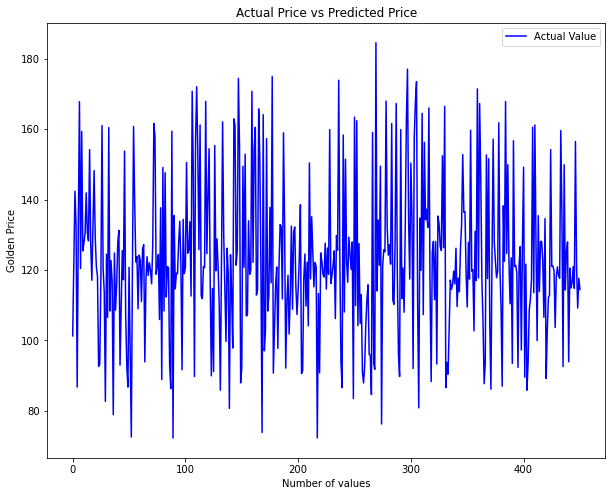

In [39]:
plt.rcParams['figure.figsize'] = [10, 8]#resize the plot
plt.plot(Y_test, color='blue', label='Actual Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

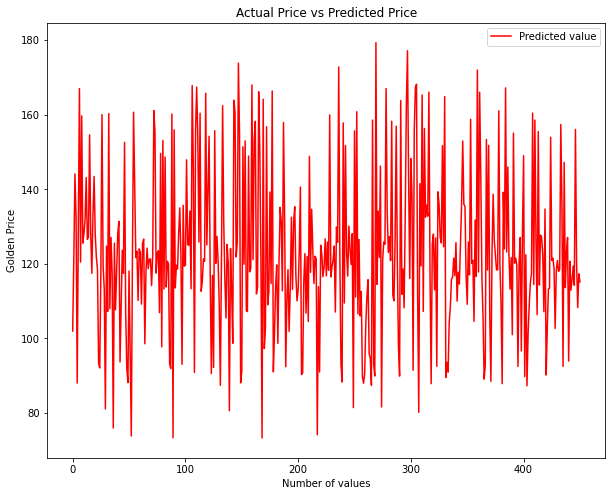

In [40]:
#plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

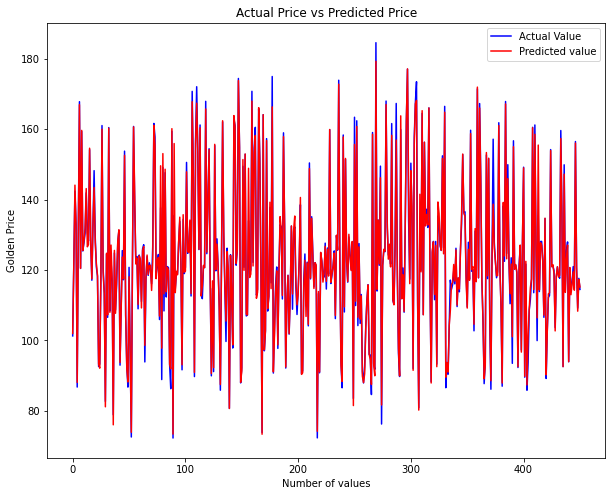

In [41]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

Building a System to use the model

In [42]:
def convertor(user_input):
    
    for i in range(len(user_input)):
        user_input[i] = float(user_input[i])

    print("values = ", tuple(user_input))
    return tuple(user_input)

In [43]:
print("how many values will you calculate: (NOTE: Press q to break)")
count = int(input())

while (count != 0):
    
    count = count-1
    input_string = input()
    user_input = input_string.split()
    if(input_string.lower() == "q"): 
        print("END")
        break
    input_data = convertor(user_input) 
    # changing input_data to a numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the array
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)#search

    # implementing the trained model
    prediction = regressor.predict(input_data_reshaped)
    print(prediction)

    print('The cost of the gold is:', prediction[0])

how many values will you calculate: (NOTE: Press q to break)
values =  (310.5, 70.550003, 15.902, 1.464794)
[96.23654644]
The cost of the gold is: 96.23654643890201
values =  (1556.219971, 33.040001, 28.02, 1.298802)
[153.38070425]
The cost of the gold is: 153.38070424999984


In [44]:
# 1310.5 70.550003 15.902 1.464794              # row_15  ~ 88.169998
# 1336.910034 69.800003 16.674999 1.483107      # row_21  ~ 92.059998
# 1556.219971 33.040001 28.02 1.298802          # row_1144 ~ 152.990005